In [15]:
import spacy
from spacy.lang.en import English
import networkx as nx
import matplotlib.pyplot as plt

In [16]:
import en_core_web_sm

nlp = en_core_web_sm.load()

In [17]:
def getSentences(text):
    nlp = English()
    nlp.add_pipe('sentencizer')
    document = nlp(text)
    return [sent.text.strip() for sent in document.sents]

def printToken(token):
    print(token.text, "->", token.dep_)

def appendChunk(original, chunk):
    return original + ' ' + chunk

def isRelationCandidate(token):
    deps = ["ROOT", "adj", "attr", "agent", "amod"]
    return any(subs in token.dep_ for subs in deps)

def isConstructionCandidate(token):
    deps = ["compound", "prep", "conj", "mod"]
    return any(subs in token.dep_ for subs in deps)

def processSubjectObjectPairs(tokens):
    subject = ''
    object = ''
    relation = ''
    subjectConstruction = ''
    objectConstruction = ''
    for token in tokens:
        printToken(token)
        if "punct" in token.dep_:
            continue
        if isRelationCandidate(token):
            relation = appendChunk(relation, token.lemma_)
        if isConstructionCandidate(token):
            if subjectConstruction:
                subjectConstruction = appendChunk(subjectConstruction, token.text)
            if objectConstruction:
                objectConstruction = appendChunk(objectConstruction, token.text)
        if "subj" in token.dep_:
            subject = appendChunk(subject, token.text)
            subject = appendChunk(subjectConstruction, subject)
            subjectConstruction = ''
        if "obj" in token.dep_:
            object = appendChunk(object, token.text)
            object = appendChunk(objectConstruction, object)
            objectConstruction = ''

#     print (subject.strip(), ",", relation.strip(), ",", object.strip())
    return (subject.strip(), relation.strip(), object.strip())

def processSentence(sentence):
    tokens = nlp_model(sentence)
    return processSubjectObjectPairs(tokens)

def printGraph(triples):
    G = nx.Graph()
    for triple in triples:
        G.add_node(triple[0])
        G.add_node(triple[1])
        G.add_node(triple[2])
        G.add_edge(triple[0], triple[1])
        G.add_edge(triple[1], triple[2])

    pos = nx.spring_layout(G)
    plt.figure(figsize=(20,20))
    nx.draw(G, pos, edge_color='black', width=1, linewidths=1,
            node_size=500, node_color='seagreen', alpha=0.9,
            labels={node: node for node in G.nodes()})
    plt.axis('off')
    plt.show()

The -> det
oversight -> compound
board -> nsubjpass
was -> auxpass
created -> ROOT
to -> aux
adjudicate -> advcl
on -> prep
some -> pobj
of -> prep
the -> det
trickiest -> amod
problems -> pobj
Facebook -> nsubj
faces -> relcl
in -> prep
operating -> pcomp
a -> det
platform -> dobj
for -> prep
a -> det
community -> pobj
larger -> amod
than -> prep
most -> amod
nations -> pobj
. -> punct
('board Facebook', 'create tricky large most', 'some problems platform community nations')
The -> det
oversight -> compound
board -> nsubjpass
was -> auxpass
created -> ROOT
to -> aux
adjudicate -> advcl
on -> prep
some -> pobj
of -> prep
the -> det
trickiest -> amod
problems -> pobj
Facebook -> nsubj
faces -> relcl
in -> prep
operating -> pcomp
a -> det
platform -> dobj
for -> prep
a -> det
community -> pobj
larger -> amod
than -> prep
most -> amod
nations -> pobj
. -> punct
It -> nsubjpass
’s -> auxpass
funded -> ROOT
by -> agent
a -> det
trust -> pobj
created -> acl
by -> agent
Facebook -> pobj
but -

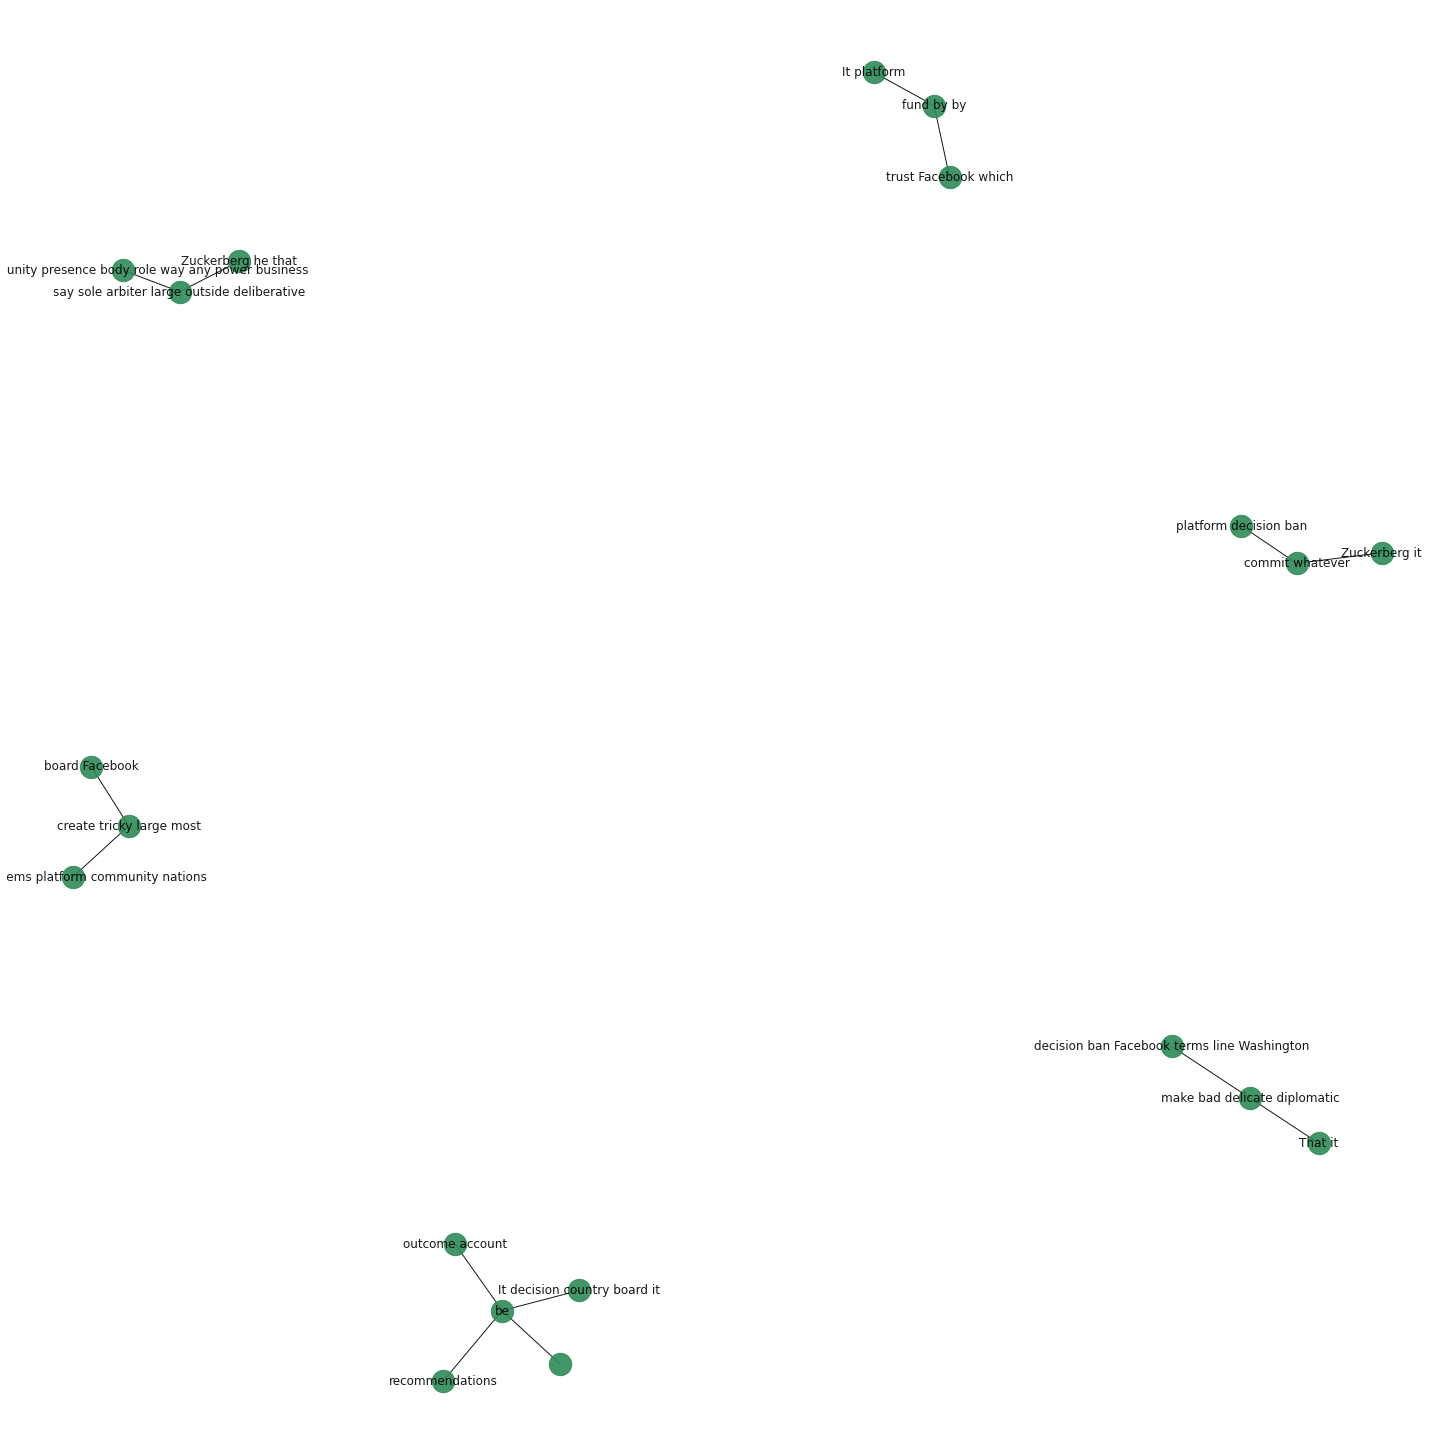

In [18]:
text = "The oversight board was created to adjudicate on some of the trickiest problems Facebook faces in operating a platform for a community larger than most nations. It’s funded by a trust created by Facebook but which the platform cannot control. The board’s recommendations are not binding. Yet Facebook CEO Mark Zuckerberg had previously committed the platform to following the board’s decision on the Trump ban, whatever it may be. Zuckerberg has long said he does not want to be the sole arbiter of truth for such a large community and has welcomed the presence of an outside body that could appear to play that role in a deliberative way — without taking away any of his power over the business. That makes the board’s decision on the Trump ban perhaps the worst-case scenario for Facebook, at least in terms of the delicate diplomatic line it walks in Washington. It was clear long before the decision was made that half the country would likely be unhappy with whichever outcome the board chose, whether it was to permanently ban or to reinstate Trump’s account."


sentences = getSentences(text)
nlp_model = spacy.load('en_core_web_lg')

triples = []
# print (text)
for sentence in sentences:
    print(processSentence(sentence))
    triples.append(processSentence(sentence))

printGraph(triples)

In [19]:
from openie import StanfordOpenIE
from graphviz import Digraph


Extracting to /Users/kalyaniasthana/.stanfordnlp_resources.
Unzip /Users/kalyaniasthana/.stanfordnlp_resources/stanford-corenlp-4.1.0.zip.
Text: The oversight board was created to adjudicate on some of the trickiest problems Facebook faces in operating a platform for a community larger than most nations. It’s funded by a trust created by Facebook but which the platform cannot control. The board’s recommendations are not binding. Yet Facebook CEO Mark Zuckerberg had previously committed the platform to following the board’s decision on the Trump ban, whatever it may be. Zuckerberg has long said he does not want to be the sole arbiter of truth for such a large community and has welcomed the presence of an outside body that could appear to play that role in a deliberative way — without taking away any of his power over the business. That makes the board’s decision on the Trump ban perhaps the worst-case scenario for Facebook, at least in terms of the delicate diplomatic line it walks in 

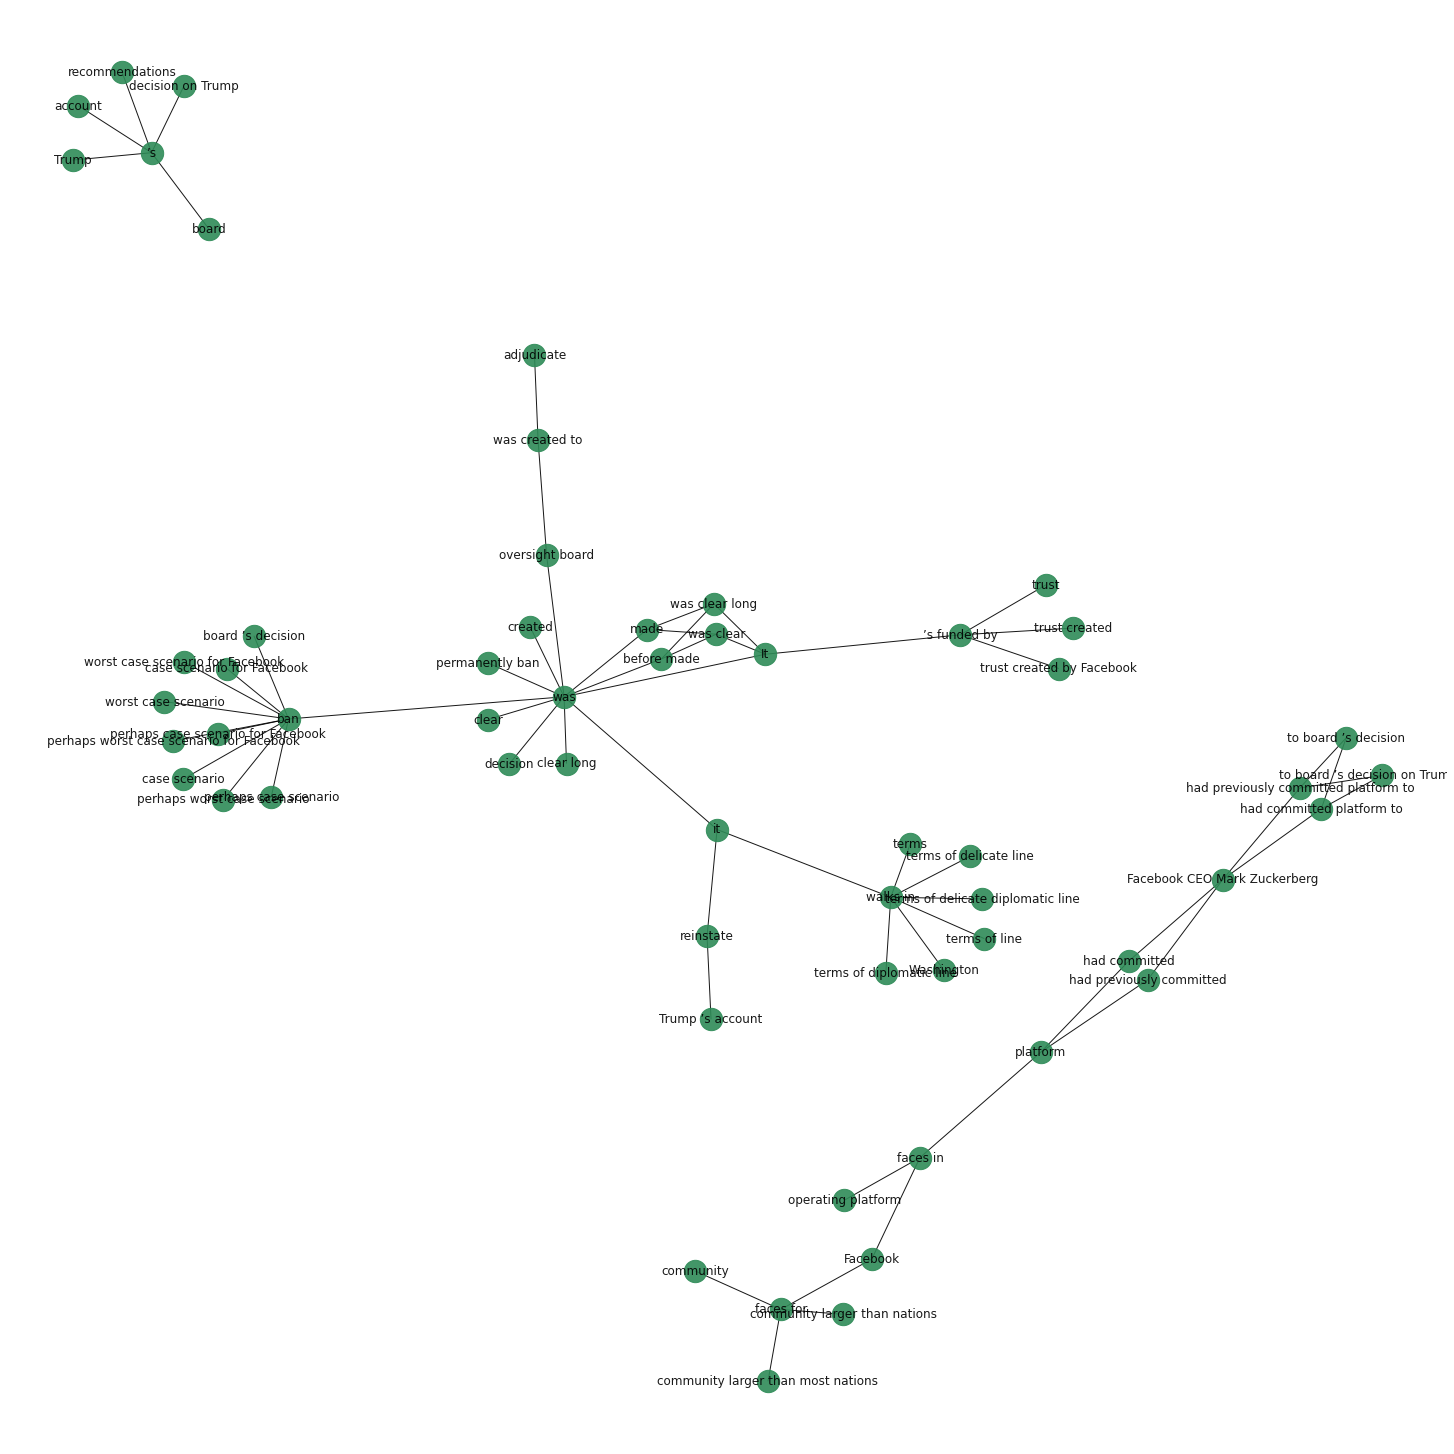

In [20]:
with StanfordOpenIE() as client:
    text = "The oversight board was created to adjudicate on some of the trickiest problems Facebook faces in operating a platform for a community larger than most nations. It’s funded by a trust created by Facebook but which the platform cannot control. The board’s recommendations are not binding. Yet Facebook CEO Mark Zuckerberg had previously committed the platform to following the board’s decision on the Trump ban, whatever it may be. Zuckerberg has long said he does not want to be the sole arbiter of truth for such a large community and has welcomed the presence of an outside body that could appear to play that role in a deliberative way — without taking away any of his power over the business. That makes the board’s decision on the Trump ban perhaps the worst-case scenario for Facebook, at least in terms of the delicate diplomatic line it walks in Washington. It was clear long before the decision was made that half the country would likely be unhappy with whichever outcome the board chose, whether it was to permanently ban or to reinstate Trump’s account."
#     text = "A new study estimates that the number of people who have died of COVID-19 in the U.S. is more than 900,000, a number 57% higher than official figures. Worldwide, the studys authors say, the COVID-19 death count is nearing 7 million, more than double the reported number of 3.24 million. The analysis comes from researchers at the University of Washingtons Institute for Health Metrics and Evaluation, who looked at excess mortality from March 2020 through May 3, 2021, compared it with what would be expected in a typical nonpandemic year, then adjusted those figures to account for a handful of other pandemic-related factors. The final count only estimates deaths caused directly by the SARS-CoV-2 virus, according to the studys authors. SARS-CoV-2 is the virus that causes COVID-19. Researchers estimated dramatic undercounts in countries such as India, Mexico and Russia, where they said the official death counts are some 400,000 too low in each country. In some countries — including Japan, Egypt and several Central Asian nations — the Institute for Health Metrics and Evaluations death toll estimate is more than 10 times higher than reported totals. The analysis just shows how challenging it has been during the pandemic to accurately track the deaths — and actually, transmission — of COVID. And by focusing in on the total COVID death rate, I think we bring to light just how much greater the impact of COVID has been already and may be in the future, said Dr. Christopher Murray, who heads the Institute for Health Metrics and Evaluation. The group reached its estimates by calculating excess mortality based on a variety of sources, including official death statistics from various countries, as well as academic studies of other locations. Then, it examined other mortality factors influenced by the pandemic. For example, some of the extra deaths were caused by increased opioid overdoses or deferred health care. On the other hand, the dramatic reduction in flu cases last winter and a modest drop in deaths caused by injury resulted in lower mortality in those categories than usual. Researchers at UW ultimately concluded that the extra deaths not directly caused by COVID-19 were effectively offset by the other reductions in death rates, leaving them to attribute all of the net excess deaths to the coronavirus. When you put all that together, we conclude that the best way, the closest estimate, for the true COVID death is still excess mortality, because some of those things are on the positive side, other factors are on the negative side, Murray said."
    print('Text: %s.' % text)
    ann = client.annotate(text, properties={'resolve_coref':'True'})
#     for triple in ann:
#         print('|-', triple)

G = nx.Graph()
for triple in ann:
    print('|-', triple)
    G.add_node(triple['subject'])
    G.add_node(triple['relation'])
    G.add_node(triple['object'])
    G.add_edge(triple['subject'], triple['relation'])
    G.add_edge(triple['relation'], triple['object'])

pos = nx.spring_layout(G)
plt.figure(figsize=(20,20))
nx.draw(G, pos, edge_color='black', width=1, linewidths=1,
        node_size=500, node_color='seagreen', alpha=0.9,
        labels={node: node for node in G.nodes()})
plt.axis('off')
plt.show()